<a href="https://colab.research.google.com/github/dnrb/word2vec_char_level/blob/master/first_file(smaller_sample).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/dnrb/word2vec_char_level.git

Cloning into 'word2vec_char_level'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 47 (delta 22), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [3]:
!ls

sample_data  word2vec_char_level


In [4]:
cd word2vec_char_level

/content/word2vec_char_level


In [5]:
!ls

 first_file.ipynb		     README.md	  tasa_2.txt
'first_file(smaller_sample).ipynb'   tasa_1.txt   tasa_3.txt


**Read the input file**

In [6]:
file  = 'tasa_1.txt'
filehandle = open(file)
lines  = filehandle.readlines()
len(lines)

250000

**Set up the corpus**

In [7]:
corpus = lines[:100]
print(corpus)
len(corpus)

['who were the first americans ?\n', 'many , many years ago , perhaps 35,000 years ago , life was very different than it is today .\n', 'at that time , the earth was in the grip of the last ice age .\n', 'there were few people anywhere in the world , and none lived in the americas .\n', 'people did live in asia , however .\n', 'and some of them wandered into north america .\n', 'the firstcomers did not know they had found a new continent .\n', 'like all ice age peoples , they were hunters .\n', 'they had to move from place to place in search of their food .\n', 'sometimes they killed giant elephants called mammoths .\n', 'some of their spearpoints have been found in several places in north america .\n', 'scientists say these are about 30,000 years old .\n', 'besides hunting , men and women of the ice age fished for their food .\n', 'they also gathered wild fruits , roots , and seeds to eat .\n', 'farming had not yet been invented .\n', 'neither had writing .\n', 'the firstcomers , ther

100

In [0]:
corpus = [x[:-2] for x in corpus]

In [0]:
#print(corpus)

**Gather every words in the corpus**

In [0]:
import string
words = []

for sentence in corpus:
    
    for word in sentence.split(' '):
        
        if word not in string.punctuation:
            words.append(word)
            


In [11]:
len(words)

1178

In [12]:
words[:10]

['who',
 'were',
 'the',
 'first',
 'americans',
 'many',
 'many',
 'years',
 'ago',
 'perhaps']

**Convert text to int**

In [0]:
def str_to_int(lst):
    counter = 0
    new_list = []
    existed = {}
    
    for string in lst:
        if string not in existed:
            existed[string] = counter
            new_list.append(existed[string])
            counter += 1
        else:
            new_list.append(existed[string])
            
    return new_list

In [0]:
word2int = str_to_int(words)

In [15]:
min(word2int)

0

In [16]:
max(word2int)

486

**Set up the constants**

In [0]:
n_Train = 50
n_Voc = max(word2int) + 1
n_Corpus = len(word2int)
WINDOW_SIZE = 2

In [18]:
n_Voc

487

**Initialize two arrays**

In [0]:
import numpy as np

def data_generate(n_Train, n_Voc, n_Corpus, WINDOW_SIZE, word2int):

    X = np.zeros((n_Train, n_Voc))
    Y = np.zeros((n_Train, n_Voc))

    for i in range(n_Train):
        j = np.random.choice(n_Corpus, 1)[0]

        tw = word2int[j]

        Y[i][tw] = 1

        for k in range(j - WINDOW_SIZE, j + WINDOW_SIZE + 1):
            if k != j and k >= 0 and k < n_Corpus:
                cw = word2int[k]
                X[i][cw] = 1
                
    return X, Y

In [20]:
data_generate(n_Train, n_Voc, n_Corpus, WINDOW_SIZE, word2int)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [21]:
import tensorflow as tf

ONE_HOT_DIM = n_Voc

# # function to convert numbers to one hot vectors
# def to_one_hot_encoding(data_point_index):
#     one_hot_encoding = np.zeros(ONE_HOT_DIM)
#     one_hot_encoding[data_point_index] = 1
#     return one_hot_encoding

# X = [] # input word
# Y = [] # target word

# for x, y in zip(df['input'], df['label']):
#     X.append(to_one_hot_encoding(word2int[ x ]))
#     Y.append(to_one_hot_encoding(word2int[ y ]))

# # convert them to numpy arrays
# X_train = np.asarray(X)
# Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float64, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float64, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 30

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM], dtype=tf.float64))
b1 = tf.Variable(tf.random_normal([1], dtype=tf.float64)) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM], dtype=tf.float64))
b2 = tf.Variable(tf.random_normal([1], dtype=tf.float64))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation(learning rate)
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


**Train**

In [22]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 30000
for i in range(iteration + 1):
    X, Y = data_generate(n_Train, n_Voc, n_Corpus, WINDOW_SIZE, word2int)
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X, y_label: Y})
    if i % 500 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X, y_label: Y}))

iteration 0 loss is :  32.04296622719695
iteration 500 loss is :  17.529217257904314
iteration 1000 loss is :  13.14421793735687
iteration 1500 loss is :  9.00173844029101
iteration 2000 loss is :  5.3566891226686275
iteration 2500 loss is :  4.579040489955244
iteration 3000 loss is :  3.3528084098859994
iteration 3500 loss is :  3.0957734352946975
iteration 4000 loss is :  2.2638078804916195
iteration 4500 loss is :  1.654495165914948
iteration 5000 loss is :  0.9825075280893308
iteration 5500 loss is :  0.6527505976141477
iteration 6000 loss is :  0.4058998272834026
iteration 6500 loss is :  0.44672412023180663
iteration 7000 loss is :  0.27424136177257474
iteration 7500 loss is :  0.3325916073007408
iteration 8000 loss is :  0.16082958499543154
iteration 8500 loss is :  0.14536720031923106
iteration 9000 loss is :  0.1504642843215238
iteration 9500 loss is :  0.16390158600276727
iteration 10000 loss is :  0.10508919656155147
iteration 10500 loss is :  0.09439408513899872
iteration 1

**Visualization**

In [34]:
import sklearn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE

Z = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
Z_embedded = TSNE(n_components=2).fit_transform(Z)
Z_embedded.shape

(4, 2)

In [43]:
vectors = sess.run(W1 + b1)
vectors

array([[-1.38003454, -1.93321875, -0.27561164, ..., -0.36862306,
         0.24335177, -1.38975367],
       [ 0.46834022,  0.29450519,  0.46831316, ..., -0.5889183 ,
        -0.44036808,  1.75123852],
       [-0.44902424,  0.88180154, -0.81416939, ..., -0.51387079,
         0.08762902,  0.80480528],
       ...,
       [ 1.45529791, -1.54279106, -0.18802773, ..., -0.17372938,
         0.30067961, -1.71048505],
       [-0.69568113,  0.54735467, -0.26768029, ...,  0.10284616,
         1.1131354 , -1.09632491],
       [ 0.61138833,  0.90891227,  1.29726984, ...,  1.18915278,
        -1.02835036, -0.70701479]])

In [44]:
vector_embedded_2d = TSNE().fit_transform(vectors)
vector_embedded.shape

(487, 3)

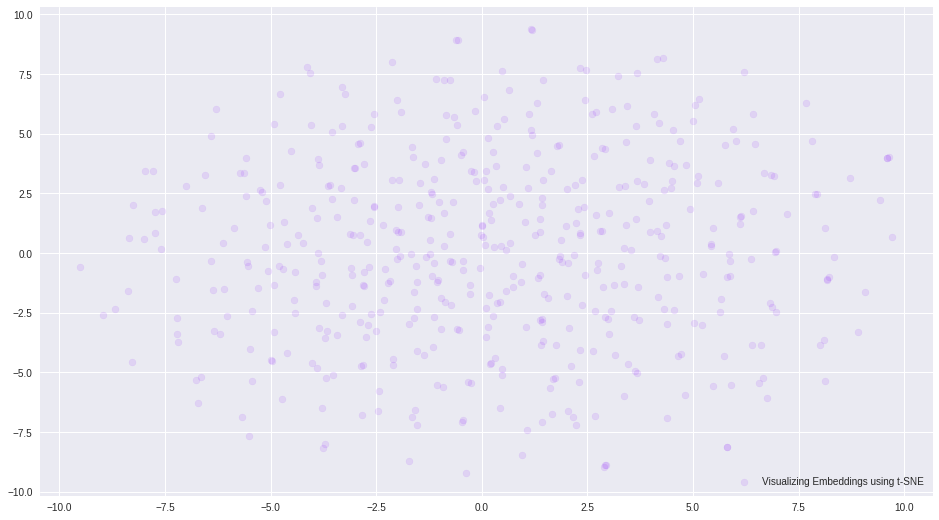

In [49]:
def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('Visualizing Embeddings using t-SNE', vector_embedded_2d, a=0.1)

In [45]:
vector_embedded_3d = TSNE(n_components=3).fit_transform(vectors)
vector_embedded.shape

(487, 3)

In [0]:
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


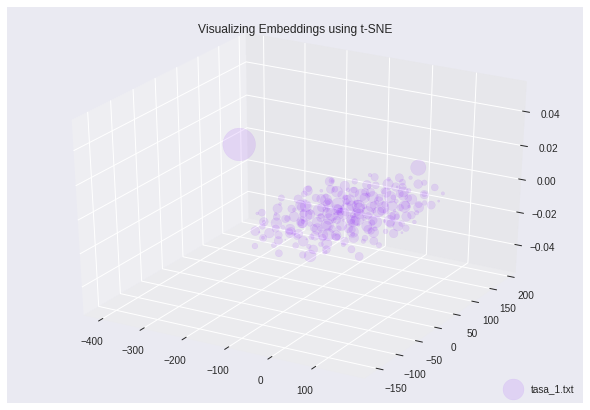

In [36]:
def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()


tsne_plot_3d('Visualizing Embeddings using t-SNE', 'tasa_1.txt', vector_embedded, a=0.1)

**Remove stop words**

In [0]:
# import nltk
# nltk.download('stopwords')

In [0]:
# stopwords = nltk.corpus.stopwords.words('english')
# cleaned_words = []

# for word in words:
#     if word not in stopwords:
#         cleaned_words.append(word)